In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import networkx as nx
import scipy as sp
import re

%matplotlib notebook

**Public Bucket for csv https://storage.googleapis.com/datascibucket/cs505/oct_committers.csv**

In [2]:
df = pd.read_csv('oct_committers.csv')

In [3]:
df = df.dropna()
df.head(100)

,committer_name,committer_email,committer_date,repo_name,total_num_commits
0,Tim Gardner,c65a040f7f664378353fb65fc3553df208a14f68@canon...,2016-10-03 01:19:38 UTC,endlessm/linux,454
1,Arno Candel,329f27436ec86be242c31f07766a746ac09e1189@gmail...,2016-10-14 22:42:01 UTC,h2oai/h2o-3,274
2,Vishal Moorthy,6e7e1cdd421bd9e00a7327c63e6b6dc428aeec90@gmail...,2016-10-23 15:17:36 UTC,Veeshal/openmrs-core,199
3,Omar Sahyoun,a96b2b56dc28a05e55acddfc13ca13060f61ada2@gmail...,2016-10-18 16:28:21 UTC,SumOfUs/Champaign,194
4,Michael James Gratton,a17fed27eaa842282862ff7c1b9c8395a26ac320@vee.net,2016-10-03 23:58:17 UTC,GNOME/geary,177
5,Mihail Muhin,8ae75315e10eaef2abb8a518e742a2cdf5fccbe1@jetbr...,2016-10-02 15:05:48 UTC,mihmuh/IntelliJConsole,149
6,Nicolas Matthew Vinson Wauquiez,18f132293a70890e40b1f942be35644307cd0085@gmail...,2016-10-26 03:15:13 UTC,NMVW/pluribus,147
7,calebmer,024ddedc1e44b2a2266115975956c072dec65389@gmail...,2016-10-09 22:59:36 UTC,calebmer/postgraphql,141
8,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,spinnaker/spinnaker,139
9,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,skim1420/spinnaker,139


In [4]:
# only gets rows where there is a valid email for the user
df_valid_emails = df[df.committer_email.str.contains(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", regex=True)]
df_valid_emails.head(100)

C:\Users\Brian\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,committer_name,committer_email,committer_date,repo_name,total_num_commits
0,Tim Gardner,c65a040f7f664378353fb65fc3553df208a14f68@canon...,2016-10-03 01:19:38 UTC,endlessm/linux,454
1,Arno Candel,329f27436ec86be242c31f07766a746ac09e1189@gmail...,2016-10-14 22:42:01 UTC,h2oai/h2o-3,274
2,Vishal Moorthy,6e7e1cdd421bd9e00a7327c63e6b6dc428aeec90@gmail...,2016-10-23 15:17:36 UTC,Veeshal/openmrs-core,199
3,Omar Sahyoun,a96b2b56dc28a05e55acddfc13ca13060f61ada2@gmail...,2016-10-18 16:28:21 UTC,SumOfUs/Champaign,194
4,Michael James Gratton,a17fed27eaa842282862ff7c1b9c8395a26ac320@vee.net,2016-10-03 23:58:17 UTC,GNOME/geary,177
5,Mihail Muhin,8ae75315e10eaef2abb8a518e742a2cdf5fccbe1@jetbr...,2016-10-02 15:05:48 UTC,mihmuh/IntelliJConsole,149
6,Nicolas Matthew Vinson Wauquiez,18f132293a70890e40b1f942be35644307cd0085@gmail...,2016-10-26 03:15:13 UTC,NMVW/pluribus,147
7,calebmer,024ddedc1e44b2a2266115975956c072dec65389@gmail...,2016-10-09 22:59:36 UTC,calebmer/postgraphql,141
8,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,spinnaker/spinnaker,139
9,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,skim1420/spinnaker,139


In [5]:
# Group by repo_name so the results are rows with repo_names with counts for contributions
unique_emailandrepo_df = df_valid_emails.groupby(['committer_email', 'committer_name', 'repo_name'], as_index=False).aggregate(np.sum).sort_values('total_num_commits', ascending=False)
unique_emailandrepo_df.reset_index()

,index,committer_email,committer_name,repo_name,total_num_commits
0,57788,1a73af9e7ae00182733b2292511b814be66f065f@pyjob...,pyjobs,pyjobs/annonces,13433
1,128190,7555aa909aeefc4b48a22650b82530052cae90a6@gmail...,nathanbl,nathanbl/date-info,4088
2,222469,f65d3f2dc139dcfe7b6f0b0a466af3bc5fed8fa7@gmail...,Nathan Chancellor,RootWizard/MagiKernel,3992
3,3963,0554fcc8949639c36b54e10d0ec815032383f759@sina.cn,Pearyman,Pearyman/webexamples,3809
4,76832,333a0a56843ecfbd7d1f247ae3587f84236536bc@hotma...,miatribepi,miatribe/pipvpspy,3667
5,7114,0968282e15ed9e224ab3a4b5d1973c8f7097dcea@gmail...,Ryan Niehaus,ryanniehaus/open_source_package_builder,3479
6,222468,f65d3f2dc139dcfe7b6f0b0a466af3bc5fed8fa7@gmail...,Nathan Chancellor,Miccia94/kernel_moto_shamu,2935
7,107190,5bb7cf2571ba39bcffbb6c25fc088ed51ff9ed06@gmail...,REV3NT3CH,B14CKB1RD-Kernel/B14CKB1RD_Kernel_N6,2909
8,77134,33bdcd680497cab5d61957b985513fceb724a953@gmail...,marcomow,marcomow/keklv,2289
9,132264,7a89f8c141f243fdebb219cb07878db4e9efb474@gmail...,pbaffiliate1,pbaffiliate1/testRepository,1903


In [36]:
# Create adjacency matrix df with users as rows and repos as columns (with empty values = 0)

first_thousand_df = unique_emailandrepo_df.head(1000)

#unique repos:
unique_repo_names = first_thousand_df.repo_name.unique()
#unique user:
unique_users = first_thousand_df.committer_email.unique()

print('Num unique repos: {}'.format(len(unique_repo_names)))
print('Num unique users: {}'.format(len(unique_users)))

#create adj matrix df
adj_matrix_df = pd.DataFrame(columns=unique_repo_names, index=unique_users).fillna(0)
square_adj_matrix_df = pd.concat([adj_matrix_df, adj_matrix_df.T]).fillna(0)
square_adj_matrix_df.shape

Num unique repos: 724
Num unique users: 200


(924, 924)

In [34]:
#SOMETHING IS WRONG WITH HOW 1S ARE BEING ASSIGNED IN THIS SQUARE ADJACENCY MATRIX

for index, row in first_thousand_df.iterrows():
    square_adj_matrix_df.loc[row['committer_email'],row['repo_name']] = 1

square_adj_matrix_df

,024ddedc1e44b2a2266115975956c072dec65389@gmail.com,02cc9a53b6755013d45c5a340cc4cc210ac3d7d4@jetbrains.com,02e0a999c50b1f88df7a8f5a04e1b76b35ea6a88@tridgell.net,049ee2061f71220e5aaf33f5be422fc2a2b06a44@gnome.org,0554fcc8949639c36b54e10d0ec815032383f759@sina.cn,072468c8d57c1bc1d0a76a9cc3a7c752ce753571@gmail.com,0840de6b6076ca6f4e62aedfe4f7cc552c7306b6@gmail.com,08c2b6caa2e0bb8e543cae64c4a5e4215509a678@gmail.com,08f59ba7a094e4bdbae8db7dfa500854d5751be1@gmail.com,0968282e15ed9e224ab3a4b5d1973c8f7097dcea@gmail.com,...,yu-aosp-staging/android_kernel_yu_msm8916,yujuhong/kubernetes,yyu168/linux,zachariasmaladroit/android_kernel_sony_msm8994_kitakami_r2,zemian/zemian.github.io,zen-kernel/zen-kernel,zephyrproject-rtos/zephyr,zhiyisun/linux,zhouhaibing089/kubernetes,zulip/zulip
1a73af9e7ae00182733b2292511b814be66f065f@pyjobs.fr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7555aa909aeefc4b48a22650b82530052cae90a6@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f65d3f2dc139dcfe7b6f0b0a466af3bc5fed8fa7@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0554fcc8949639c36b54e10d0ec815032383f759@sina.cn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333a0a56843ecfbd7d1f247ae3587f84236536bc@hotmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0968282e15ed9e224ab3a4b5d1973c8f7097dcea@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5bb7cf2571ba39bcffbb6c25fc088ed51ff9ed06@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33bdcd680497cab5d61957b985513fceb724a953@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7a89f8c141f243fdebb219cb07878db4e9efb474@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f82c7feeda2a70c25ae8184a265fb7086daee1e4@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# square_adj_matrix_df = pd.concat([adj_matrix_df, adj_matrix_df.T]).fillna(0)
# # square_adj_matrix_df[square_adj_matrix_df.loc[:,:]==1]
# square_adj_matrix_df = adj_matrix_df.reindex(adj_matrix_df.columns)
# square_adj_matrix_df

In [9]:
# df2 = pd.concat([df, df.T]).fillna(0)

# square_adj_matrix_df = adj_matrix_df.reindex(adj_matrix_df.columns)
# square_adj_matrix_df

In [38]:
# Create graph

G = nx.from_numpy_matrix(square_adj_matrix_df.as_matrix())
G = nx.relabel_nodes(G, dict(enumerate(square_adj_matrix_df.columns)))

print (len(G.nodes()))

#Remove nodes that are emails?

924


In [11]:
square_adj_matrix_df.as_matrix()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [12]:
degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence
dmax=max(degree_sequence)
print (dmax)

114


In [17]:
core_dec = nx.core_number(G)
print (core_dec)
print(max(core_dec.values()))

{'f74215b1f1bdb2b918a0f6cb6ff51f500093cbbb@gmail.com': 0, 'lordcephei/lordcephei.github.io': 1, 'radishengine/drowsy': 1, 'derekwaynecarr/kubernetes': 1, 'bff1f60791f4d843ebf4c0302567471f580e757c@redhat.com': 0, 'lameze/moodle': 1, 'FreeRDP/FreeRDP': 1, 'jkotas/roslyn': 1, '760e7dab2836853c63805033e514668301fa9c47@brianshumate.com': 1, 'h2oai/h2o-3': 1, 'pvpgamecrash/pvpgamecrash.github.io': 1, 'soonsystems/moodle': 1, '16f10c154f64d7995217977de070ec760cf09f0e@koding.com': 1, 'fhedberg/ardupilot': 1, '639ae3d6066930dbc2513fddeaee8b93e07b090e@gmail.com': 1, '5d97e6ddacbebfbcdda9f8fd242d7d2670aa652a@valex.is': 1, 'svanharmelen/terraform': 1, 'kc284/xen-api': 1, 'AllviewDevelopment/android_kernel_mediatek_mt6795': 1, '0ccb355d7aa08f1a2a9103e16d9034fc018e984f@gmail.com': 1, 'heuripedes/RetroArch': 1, '201e3ca0515b4c2f115190fe4475ccc439f1f1a4@google.com': 1, 'sputnik13/kubernetes': 1, 'a1c1296e84b8aa1849fc259d09cb19bed8e33f41@gmail.com': 0, '39e75aabf777863e894981b42cd561674f753f72@gmail.co

<IPython.core.display.Javascript object>


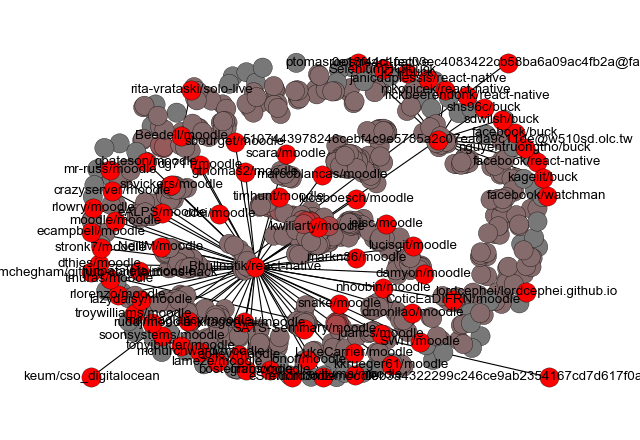

In [15]:
colors = ['#787878', '#856b6b', '#965a5b', '#a7494b', '#bb3537', '#cb2528', '#cb2528', '#f00004']
node_colors = [ colors[core_dec[v]] for v in G.nodes()]

nx.draw(G, node_color=node_colors, with_labels=False)


# Fiedler vector

In [19]:
graphs = list(nx.connected_component_subgraphs(G))

In [20]:
graphs

In [29]:
for i, g in enumerate(graphs):
    f = nx.fiedler_vector(g)
#     s = np.zeros(len(f))
#     s[f>0]=1
#     s = s.astype(int)
#     s = s.tolist()
    colors = ['#d7191c', '#2b83ba']
#     node_colors = [ colors[s[v]] for v in G.nodes()]
#     node_colors = ['#d7191c' if f[i] < 0 else '#2b83ba' for i, v in enumerate(G.nodes())]
    nx.draw(g, with_labels='True')
    if i == 2:
        break